In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
X_train = pd.read_csv('X_train.csv', index_col='date', parse_dates=True)
X_test = pd.read_csv('X_test.csv', index_col='date', parse_dates=True)
y_train = pd.read_csv('y_train.csv', index_col='date', parse_dates=True).squeeze()
y_test = pd.read_csv('y_test.csv', index_col='date', parse_dates=True).squeeze()

In [4]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print(f"🔍 {name} Performance on Test Set:")
    print(f"  R²:  {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.index, y_test.values, label='Actual', linewidth=2)
    plt.plot(y_test.index, y_pred_test, label='Predicted', linestyle='--')
    plt.title(f"{name} — Actual vs. Predicted")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "Model": name,
        "R2": r2,
        "MAE": mae,
        "MSE": mse
    }


🔍 Linear Regression Performance on Test Set:
  R²:  0.8384
  MAE: 1506.2201
  MSE: 3706381.4055


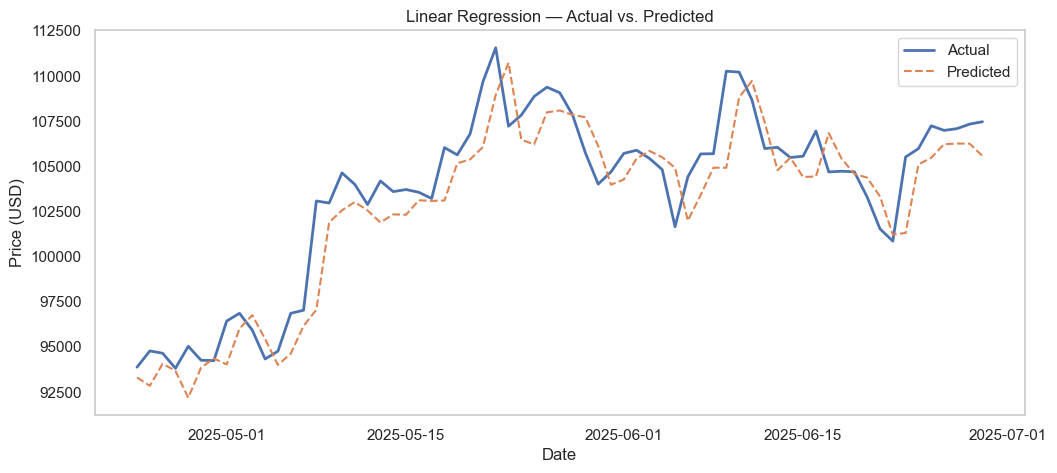

🔍 Ridge Regression Performance on Test Set:
  R²:  0.8454
  MAE: 1457.8083
  MSE: 3547327.4871


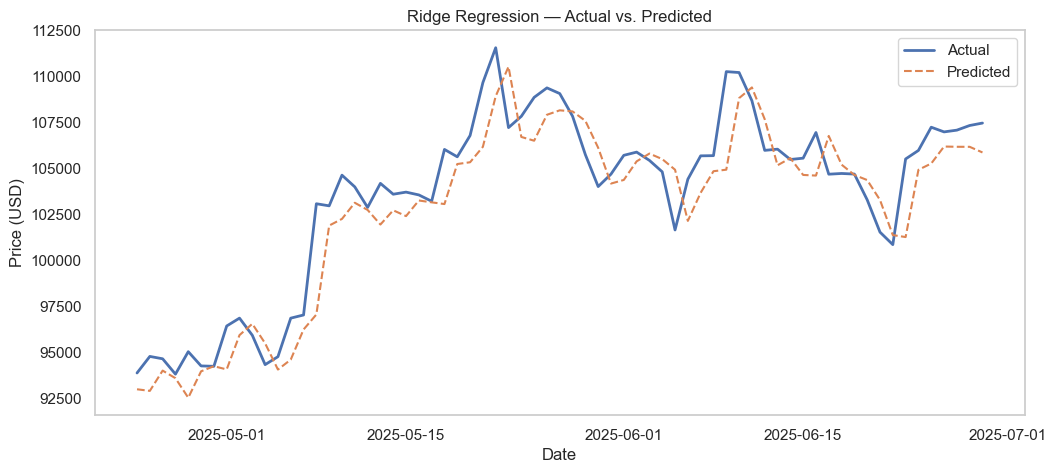

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+08, tolerance: 6.838e+06
  model = cd_fast.enet_coordinate_descent(


🔍 Lasso Regression Performance on Test Set:
  R²:  0.8382
  MAE: 1502.3193
  MSE: 3711181.9477


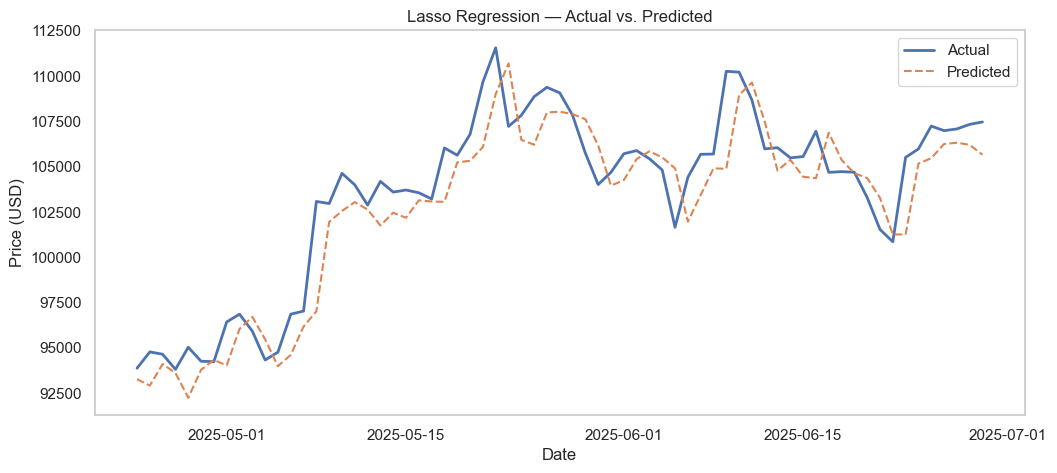

🔍 Random Forest Performance on Test Set:
  R²:  0.2919
  MAE: 3290.8976
  MSE: 16244495.2027


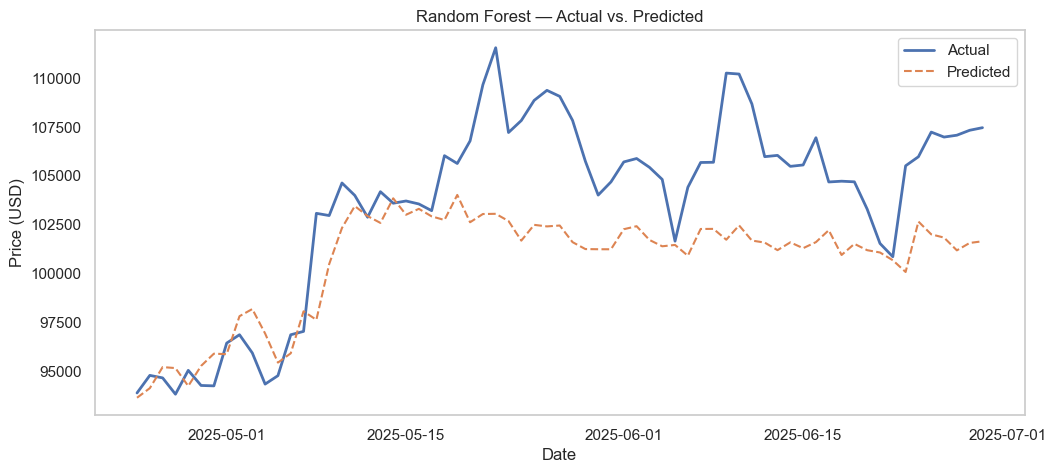

🔍 XGBoost Performance on Test Set:
  R²:  -0.3818
  MAE: 4813.4392
  MSE: 31702192.1514


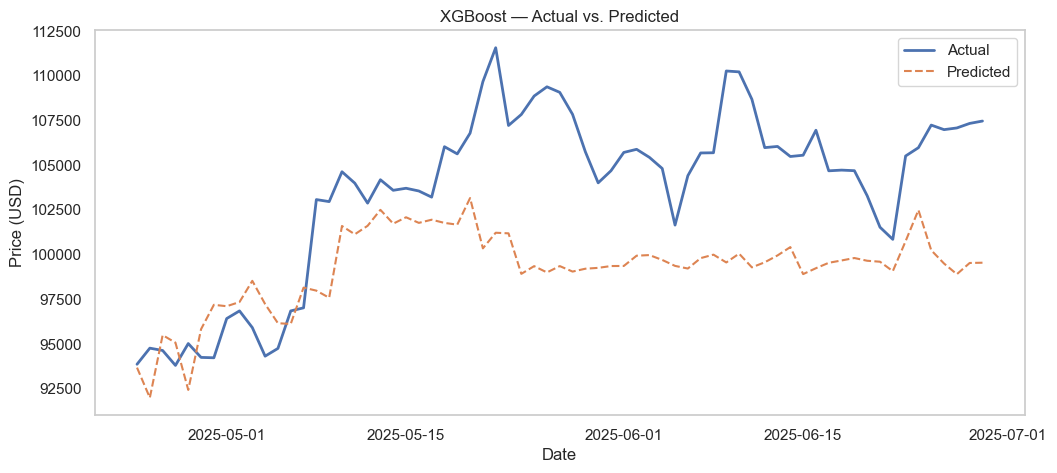

In [5]:
# 4. Train Models

results = []

## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results.append(evaluate_model(lr, X_train, y_train, X_test, y_test, "Linear Regression"))

## Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
results.append(evaluate_model(ridge, X_train, y_train, X_test, y_test, "Ridge Regression"))

## Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
results.append(evaluate_model(lasso, X_train, y_train, X_test, y_test, "Lasso Regression"))

## Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
results.append(evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest"))

## XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
results.append(evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost"))

In [6]:
# 5. Compare Results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2", ascending=False)
print("\n📊 Model Comparison:")
display(results_df)


📊 Model Comparison:


,Model,R2,MAE,MSE
1,Ridge Regression,0.845382,1457.808303,3.547327e+06
0,Linear Regression,0.838449,1506.220108,3.706381e+06
2,Lasso Regression,0.838240,1502.319337,3.711182e+06
3,Random Forest,0.291947,3290.897604,1.624450e+07
4,XGBoost,-0.381811,4813.439153,3.170219e+07


In [9]:
joblib.dump(ridge, 'best_model.pkl')
print("Best model (Ridge Regression) saved to 'best_model.pkl'.")

Best model (Ridge Regression) saved to 'best_model.pkl'.
